In [1]:
import pandas as pd
import seaborn as sns

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
housing_raw = pd.read_csv("D:/STUDIES/Data Visualization/Data/housing_data.csv", 
                          parse_dates=['period_begin', 'period_end'], 
                          dtype={'total_homes_sold':'Int32', 'region_name': 'category'})

ca_housing = (housing_raw.loc[housing_raw['region_name'].str.contains("CA")]\
                .assign(region_name = housing_raw['region_name'].str[0:-11]))

ca_housing_pivot = ca_housing.pivot_table(index="period_begin", columns="region_name", 
                                          values="median_active_list_price")\
                    .loc[:,["San Francisco", "Los Angeles", "San Diego", "Tulare"]]\
                    .assign(overall_avg = lambda x:x.mean(axis=1))

In [4]:
ca_housing_pivot.head()

region_name,San Francisco,Los Angeles,San Diego,Tulare,overall_avg
period_begin,,,,,
2017-01-02,1229018.7,611561.0,618570.8,225395.8,671136.575
2017-01-09,1233393.7,614061.0,621737.5,227729.1,674230.325
2017-01-16,1239977.0,617311.0,625820.8,229060.4,678042.300
2017-01-23,1247977.0,620644.3,629491.6,229806.2,681979.775
2017-01-30,1253310.4,624541.6,632824.0,230139.5,685203.875


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


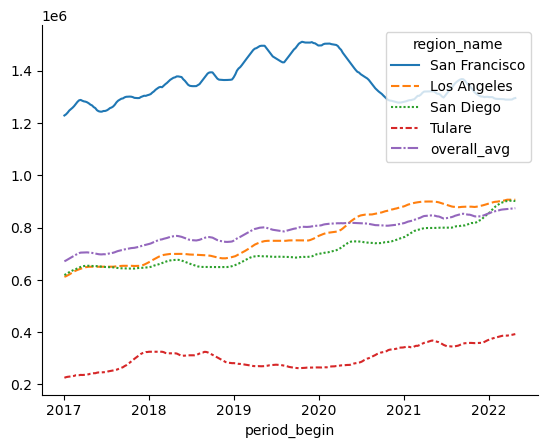

In [21]:
# using seaborn with the already aggregated dataframe
sns.lineplot(
    data = ca_housing_pivot,
#     x = ca_housing_pivot.index,
#     y = "overall_avg"
);

sns.despine();

In [9]:
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
164,Nevada,2018-09-03,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
252,Stanislaus,2017-06-05,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
293,Tehama,2020-01-20,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228
304,Stanislaus,2017-11-13,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362


C:\Users\hp\AppData\Local\Temp\ipykernel_104124\3420147235.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


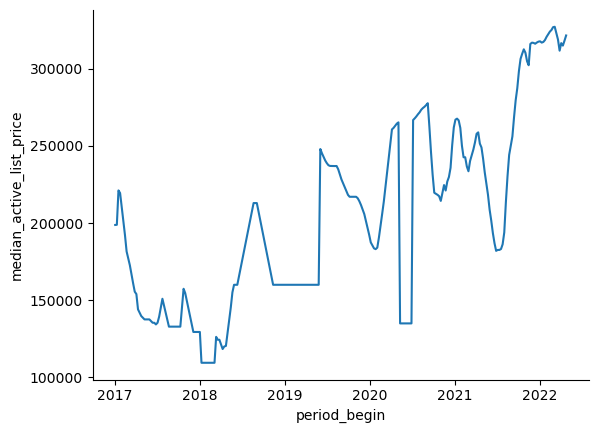

In [17]:
# using seaborn with un-aggregated dataframe

sns.lineplot(
    data = ca_housing,
    x = 'period_begin',
    y = 'median_active_list_price',
    ci=None,
    estimator='min'
);

sns.despine();

C:\Users\hp\AppData\Local\Temp\ipykernel_104124\3903124349.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_grou

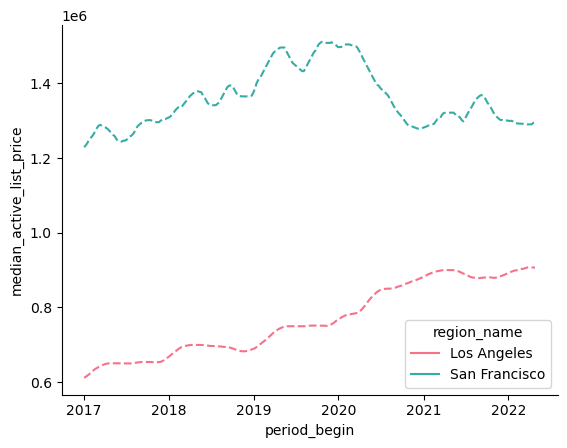

In [20]:
sns.lineplot(
    data = ca_housing.query("region_name in ['Los Angeles', 'San Francisco']"),
    x = 'period_begin',
    y = 'median_active_list_price',
    ci=None,    
    hue="region_name",
    palette = "husl",
    ls="--"
);

sns.despine();